Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the Dataset

In [2]:
customer_data = pd.read_csv(r'/Users/pushpesh/vois/Assignment/Bank_Customer_Churn_dataset.csv')

Feature Selection

In [3]:
columns = customer_data.columns.values.tolist()

dataset = customer_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
#drops unnecessary columns to make the model trining lighter

Converting Categorical Columns to Numeric Columns

In [4]:
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

dataset = pd.concat([dataset,Geography,Gender], axis=1)
# concat to make a dataset to use in further process

Data Preprocessing

In [5]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Machine Learning Algorithm Training
and Evaluation of the model

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

#using random forest classifier according to referce at https://learnpython.com/blog/python-customer-churn-prediction/

In [8]:
# a better predicting model XGboost

from xgboost import XGBClassifier
xgbcl = XGBClassifier(n_estimators=200, random_state=0)
#xgbcl.fit(X_train,y_train)
#y_xgbcl = xgbcl.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print("RandomForestClassifier :", accuracy_score(y_test, predictions ))

#print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

RandomForestClassifier : 0.8635


Feature Evaluation

<AxesSubplot:>

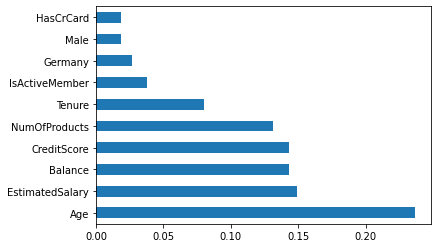

In [10]:
#just to represent the evaluated result

feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')